In [30]:
import tensorflow as tf 
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image_dataset_from_directory
import cv2
face_cascade = cv2.CascadeClassifier('./haarcascade/haarcascade_frontalface_default.xml')

In [4]:
dataset_path = "./cropped"
full_dataset = image_dataset_from_directory(
    dataset_path,
    image_size=(224, 224),
    color_mode="grayscale",
     batch_size=None
)
class_names = full_dataset.class_names
num_classes = len(class_names)
print("Classes:", class_names)

Found 2716 files belonging to 10 classes.
Classes: ['Anushka_Sharma', 'Barack_Obama', 'Bill_Gates', 'Dalai_Lama', 'Indira_Nooyi', 'Melinda_Gates', 'Narendra_Modi', 'Sundar_Pichai', 'Vikas_Khanna', 'Virat_Kohli']


In [5]:
images = []
labels = []


for image, label in full_dataset:
    # Normalize images (Convert pixels 0-255 → 0-1)
    gray_image = image.numpy() / 255.0  # Normalize
    images.append(gray_image)
    labels.append(label.numpy())


images = np.array(images)
labels = np.array(labels)

# Print shape (should be: (num_samples, 224, 224, 1))
print("Image shape:", images.shape)

Image shape: (2716, 224, 224, 1)


Melinda_Gates


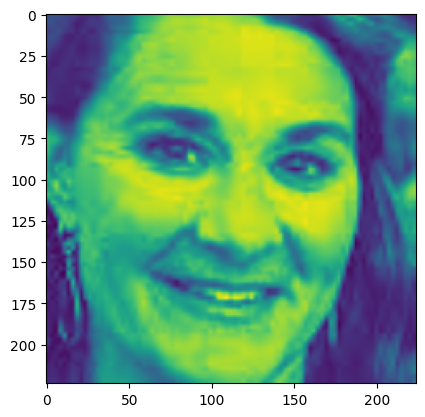

In [6]:

print(class_names[labels[500]])
plt.imshow(images[500])

In [7]:
print(labels.shape)
labels

(2716,)


array([9, 7, 0, ..., 8, 1, 1], dtype=int32)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images,labels,test_size=0.2,random_state=5)

In [9]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.summary()

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      11,944,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,963,466 (45.64 MB)

 Trainable params: 11,963,466 (45.64 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 35s 489ms/step - accuracy: 0.1776 - loss: 3.1122
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 33s 484ms/step - accuracy: 0.5843 - loss: 1.2309
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 33s 480ms/step - accuracy: 0.8126 - loss: 0.6092
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 34s 499ms/step - accuracy: 0.8600 - loss: 0.4389
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 33s 480ms/step - accuracy: 0.9265 - loss: 0.2590
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 41s 485ms/step - accuracy: 0.9447 - loss: 0.1844
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 33s 484ms/step - accuracy: 0.9686 - loss: 0.1194
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 32s 474ms/step - accuracy: 0.9743 - loss: 0.0930
Epoch 9/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 32s 470ms/step - accuracy: 0.9726 - loss: 0.1003
Epoch 10/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 32s 477ms/step - accuracy: 0.9919 - loss: 0.0400


In [12]:
cnn.evaluate(X_test,y_test)
cnn.save("celebrity_classifier.keras")

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.8601 - loss: 0.5589


In [13]:
y_pred = cnn.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step


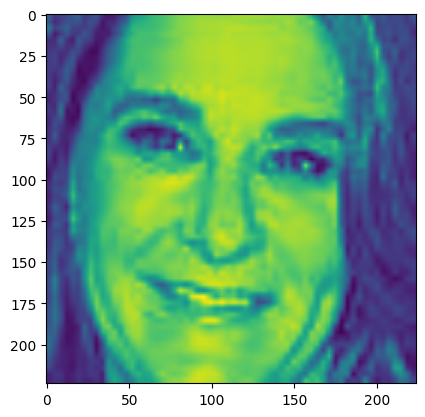

In [28]:
plt.imshow(X_test[90])
class_names[y_classes[90]]

In [36]:
def predict_face(img_path, model, class_names):
    # Load image using OpenCV
    img = cv2.imread(img_path)
    
    if img is None:
        print("Error: Unable to load image!")
        return None
    
    print(f"Original Image Shape: {img.shape}")
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        print("No face detected!")
        return None

    # Assume the first detected face is the target face
    x, y, w, h = faces[0]
    face = gray[y:y+h, x:x+w]  # Crop the face

    # Resize face to match CNN input size (224x224)
    face_resized = cv2.resize(face, (224, 224))

    # Normalize and reshape for model input
    face_array = np.array(face_resized, dtype=np.float32) / 255.0  # Normalize to [0,1]
    face_array = np.expand_dims(face_array, axis=-1)  # Add channel dimension (224, 224, 1)
    face_array = np.expand_dims(face_array, axis=0)  # Add batch dimension (1, 224, 224, 1)

    # Predict class
    predictions = model.predict(face_array)
    predicted_label = np.argmax(predictions)  # Get highest probability class

    return class_names[predicted_label]

img_path = "./test1.jpg"
predicted_celebrity = predict_face(img_path, cnn, class_names)

print(predicted_celebrity )

Original Image Shape: (2608, 1916, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Barack_Obama
